# Census-Income

In the given project the dataset contains information like age, gender, education,Occupation, Race etc.., based on which the task is to predict if the income of a person is greater than or less than 50K 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import statsmodels.api as k
from sklearn.preprocessing import LabelEncoder, PowerTransformer,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Removing duplicates if any:
data=data.drop_duplicates(keep='first')
data.shape

(32536, 15)

In [4]:
data=data.reset_index(drop=True)

Duplicates have been dropped

In [5]:
# checking for missing values
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values present

In [6]:
# looking at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The dataset has both numerical and categorical data

In [7]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Looks like Education and Education number are same columns ie.., Education number is encoded form of Education

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


From the above table it is again observed Capital Gain and Capital_loss have more zeros

Also Hours_per week is a little skewed

In [9]:
data[['Education','Education_num']]

,Education,Education_num
0,Bachelors,13
1,HS-grad,9
2,11th,7
3,Bachelors,13
4,Masters,14
...,...,...
32531,Assoc-acdm,12
32532,HS-grad,9
32533,HS-grad,9
32534,HS-grad,9


We obsreve that Bachelor's degree is 13 and HS-grad is 9 in the above 

Hence we can ay they are the csame colums

Deleting Education_num from the dataset

In [10]:
data=data.drop(columns=['Education_num'])

In [11]:
#Dividing the data into numerical and categorical data
n_data = data [['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss','Hours_per_week']]
c_data = data.drop(columns=['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss','Hours_per_week'])

# Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

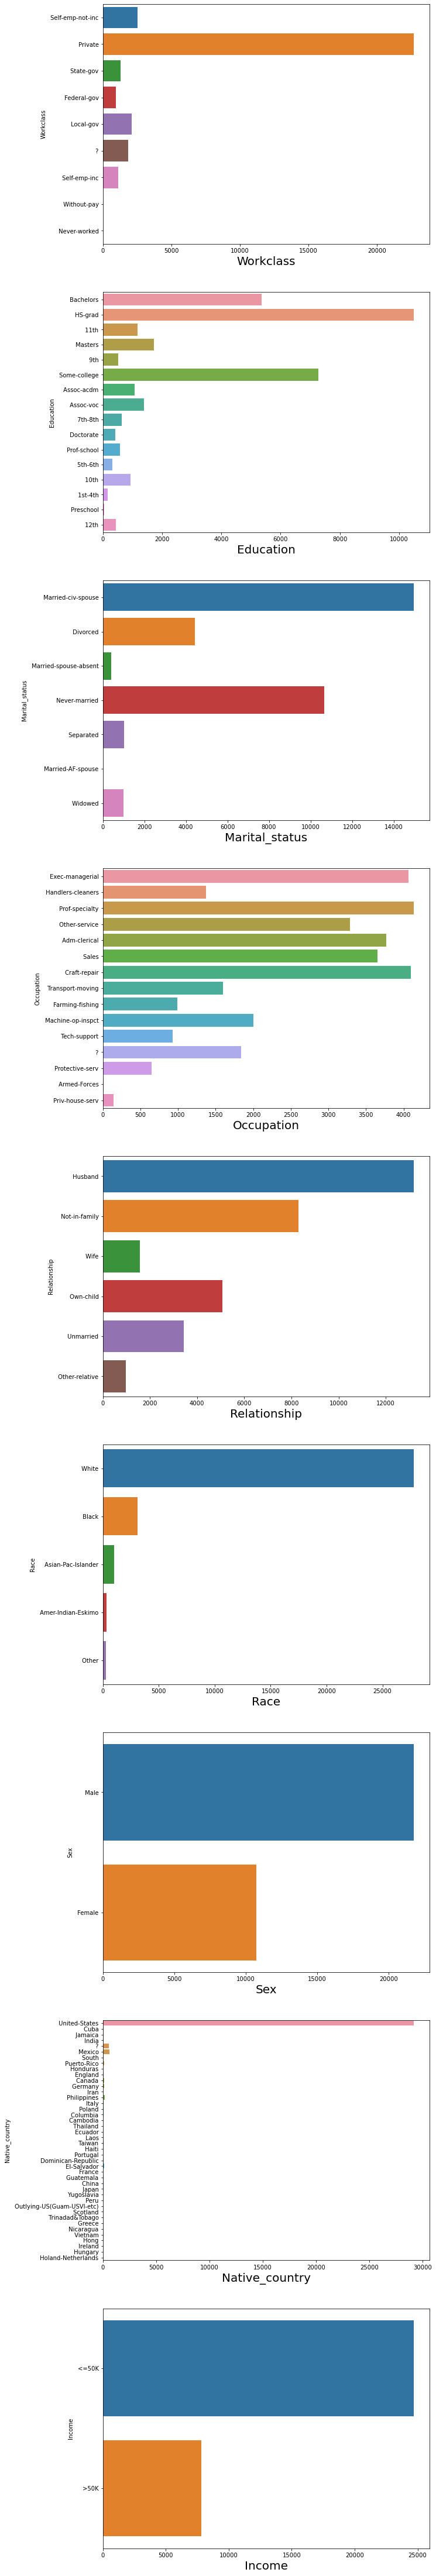

In [12]:
#Plotting count plots for categorical data

plt.figure(figsize=(10,80))
plotnumber = 1
for column in c_data:
    if plotnumber <=9:
        ax= plt.subplot(9,1,plotnumber)
        sns.countplot(data=c_data,y=c_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show

Interpreting the graphs

1.Workclass has a category ? which implies missing data

2.Education column looks good with most of the people HighScholl Grads, followed by Bachelors and then some college

3.The column Marital status looks good

4.Occupation also has a category ? which implie missing data

5.Column Relationship looks good

6.Under Race most people are white

7.There are more men compaired to women

8.Majority of the people are native americans there is also ? in the native country column

9.There are more people with income less than 50K implies the dataset is imbalanced

In [13]:
#checking for unique categoriesz
column_names = c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Workclass
------------------------------------------
 Private             69.685886
 Self-emp-not-inc     7.806737
 Local-gov            6.432874
 ?                    5.642980
 State-gov            3.986354
 Self-emp-inc         3.430047
 Federal-gov          2.950578
 Without-pay          0.043029
 Never-worked         0.021515
Name: Workclass, dtype: float64


Column Name        : Education
------------------------------------------
 HS-grad         32.253504
 Some-college    22.381362
 Bachelors       16.449471
 Masters          5.292599
 Assoc-voc        4.247603
 11th             3.611384
 Assoc-acdm       3.279444
 10th             2.867593
 7th-8th          1.982419
 Prof-school      1.770347
 9th              1.579789
 12th             1.330834
 Doctorate        1.269363
 5th-6th          1.020408
 1st-4th          0.510204
 Preschool        0.153676
Name: Education, dtype: float64


Column Name        : Marital_status
-------------------------------------

In [14]:
#Let's deal with '?' in the dataset:
data = data.replace (" ?", np.nan)

In [15]:
data.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

Now the ? are replaced with null values we will impute them using forward fill

In [16]:
data.fillna(method="ffill",inplace=True)

In [17]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [18]:
#checking for unique categoriesz
column_names = c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Workclass
------------------------------------------
 Private             73.985739
 Self-emp-not-inc     8.255471
 Local-gov            6.774035
 State-gov            4.219941
 Self-emp-inc         3.617531
 Federal-gov          3.079666
 Without-pay          0.046103
 Never-worked         0.021515
Name: Workclass, dtype: float64


Column Name        : Education
------------------------------------------
 HS-grad         32.253504
 Some-college    22.381362
 Bachelors       16.449471
 Masters          5.292599
 Assoc-voc        4.247603
 11th             3.611384
 Assoc-acdm       3.279444
 10th             2.867593
 7th-8th          1.982419
 Prof-school      1.770347
 9th              1.579789
 12th             1.330834
 Doctorate        1.269363
 5th-6th          1.020408
 1st-4th          0.510204
 Preschool        0.153676
Name: Education, dtype: float64


Column Name        : Marital_status
------------------------------------------
 Married-civ-spouse      

Now that we have looked at the categorical data and handled the missing values let's look at the numerical data

<function matplotlib.pyplot.show(close=None, block=None)>

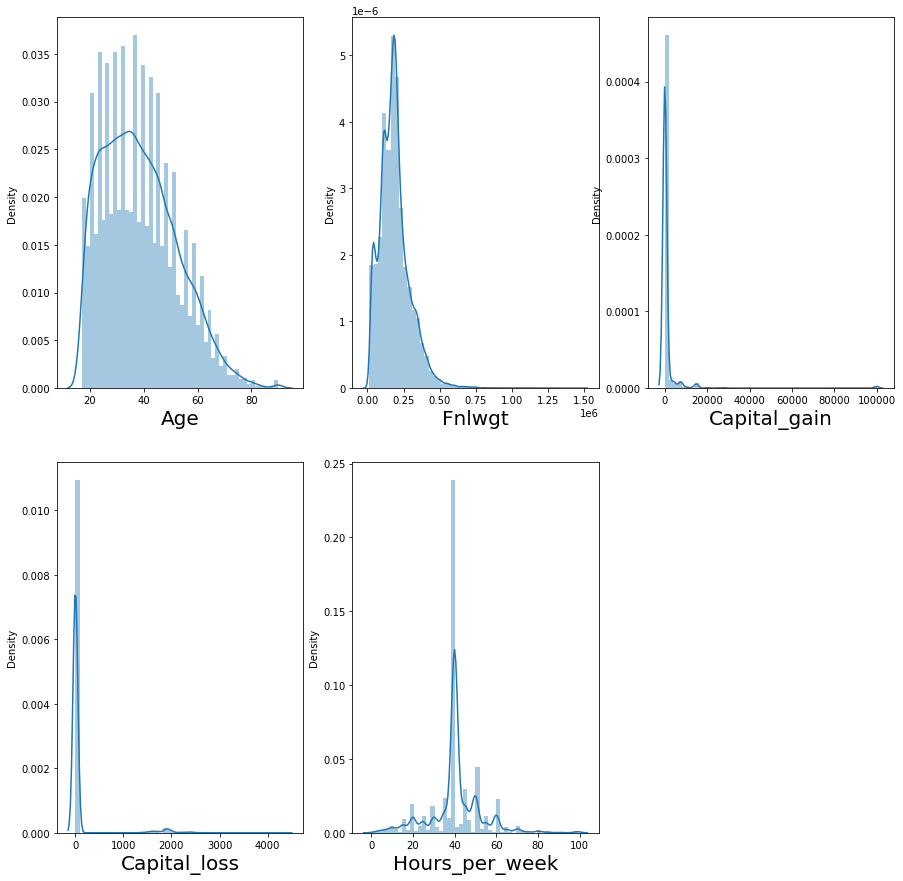

In [19]:
#Analysing numerical data
plt.figure(figsize=(15,15))
plotnumber = 1
for column in n_data:
    if plotnumber <=5:
        ax= plt.subplot(2,3,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

Numerical columns look good but there are outliers and skewness in the data 

In [20]:
#Lets check for skewness
n_data.skew()

Age                0.557657
Fnlwgt             1.447695
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

above data has a few skewed columns and has ouliers
let's find the outliers and try to correct the skewness

In [21]:
#Encoding careorical data:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [22]:
data

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,3,257302,7,2,12,5,4,0,0,0,38,38,0
32532,40,3,154374,11,2,6,0,4,1,0,0,40,38,1
32533,58,3,151910,11,6,0,4,4,0,0,0,40,38,0
32534,22,3,201490,11,4,0,3,4,1,0,0,20,38,0


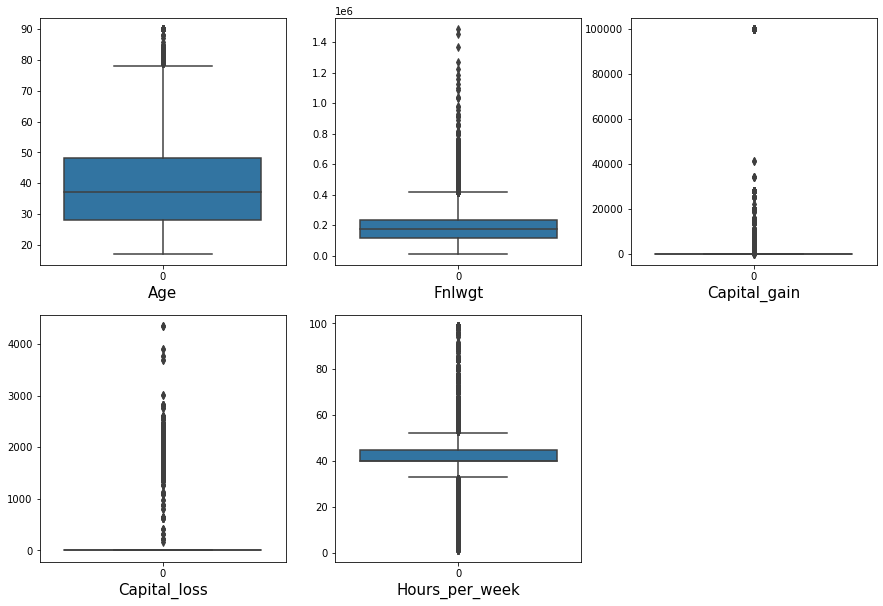

In [23]:
# Visualising outliers using box plot
# Checking for outliers using boxplot
plt.figure(figsize=(15,10))
graph =1
for column in n_data:
    if graph <=5:
        plt.subplot(2,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

From the above graphs we observe the presence of outliers in all the columns

However columns capital_gain and capital_loss mostly have zeros in the columns making it highly skewed

 Let's find the outliers using z-score

In [24]:
features=data[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
c_outliers=np.where(z>3)
c_outliers

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([4, 3, 4, ..., 0, 4, 4], dtype=int64))

In [25]:
new_data=data.drop(c_outliers[0],axis=0)
new_data

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,27,3,257302,7,2,12,5,4,0,0,0,38,38,0
32532,40,3,154374,11,2,6,0,4,1,0,0,40,38,1
32533,58,3,151910,11,6,0,4,4,0,0,0,40,38,0
32534,22,3,201490,11,4,0,3,4,1,0,0,20,38,0


In [26]:
data_loss=((32535-30006)/32535)*100
data_loss

7.773167358229599

In [27]:
new_data.skew()

Age                0.489089
Workclass          0.083732
Fnlwgt             0.634650
Education         -0.927482
Marital_status    -0.046984
Occupation         0.111304
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       4.955914
Capital_loss      29.750401
Hours_per_week    -0.349780
Native_country    -4.170378
Income             1.338926
dtype: float64

Deleting the outliers will give a data loss of 7.77%

Also deleting the outliers reduced the skewness of Capital_gain but has increased the skewness of Capital Loss by many times

Hence not deleting the outliers 

Will use Power Transformer to deal with the outliers and skewness

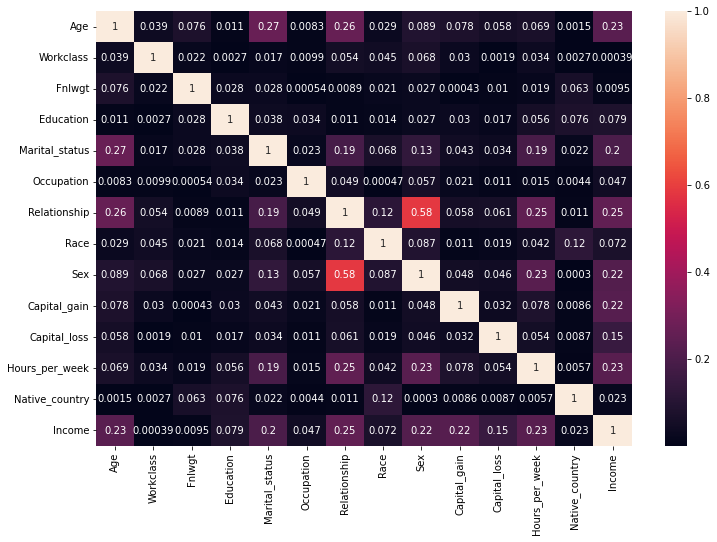

In [28]:
## Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

The heatmap looks good 

None of the features seem to have multicollinearity

Feature and label relationship also looks good

 Using Power Transformer to deal with above issues of outliers and skewness and then calculating vifs to check for  multicollinearity  

In [29]:
#Dividing data into features and label

X = data.drop(columns=['Income'])
Y= data['Income']

In [30]:

pt = PowerTransformer()

X_scaled = pd.DataFrame(pt.fit_transform(X), columns=X.columns)
X_scaled

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.891733,1.690378,-1.089960,-0.476830,-0.383005,-0.640674,-1.094450,0.412918,0.703036,-0.301491,-0.221299,-2.222186,0.297144
1,0.102259,-0.099893,0.398771,0.090708,-1.782346,-0.109771,0.134548,0.412918,0.703036,-0.301491,-0.221299,-0.035725,0.297144
2,1.064242,-0.099893,0.562562,-2.067623,-0.383005,-0.109771,-1.094450,-2.431782,0.703036,-0.301491,-0.221299,-0.035725,0.297144
3,-0.732199,-0.099893,1.340353,-0.476830,-0.383005,0.782380,1.548769,-2.431782,-1.422403,-0.301491,-0.221299,-0.035725,-3.383038
4,0.027550,-0.099893,0.957178,0.395380,-0.383005,-0.640674,1.548769,0.412918,-1.422403,-0.301491,-0.221299,-0.035725,0.297144
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,-0.828514,-0.099893,0.746761,-0.984585,-0.383005,1.364086,1.548769,0.412918,-1.422403,-0.301491,-0.221299,-0.197711,0.297144
32532,0.246949,-0.099893,-0.193274,0.090708,-0.383005,0.130113,-1.094450,0.412918,0.703036,-0.301491,-0.221299,-0.035725,0.297144
32533,1.334550,-0.099893,-0.219732,0.090708,2.171510,-1.707192,1.351188,0.412918,-1.422403,-0.301491,-0.221299,-0.035725,0.297144
32534,-1.358807,-0.099893,0.271699,0.090708,0.919930,-1.707192,1.090940,0.412918,0.703036,-0.301491,-0.221299,-1.655414,0.297144


In [31]:
#checking for skewness
X_scaled.skew()

Age              -0.013967
Workclass         0.192399
Fnlwgt            0.016961
Education        -0.309379
Marital_status   -0.114050
Occupation       -0.204481
Relationship      0.123000
Race             -2.010646
Sex              -0.719400
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.229590
Native_country   -2.949950
dtype: float64

After performing Power Transform Capital_gain and Capital_loss column is still skewed

Hence will use models which perform well with skewed data during model selection

In [32]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,1.262964,Age
1,1.008948,Workclass
2,1.016356,Fnlwgt
3,1.016733,Education
4,1.168635,Marital_status
5,1.009976,Occupation
6,1.923713,Relationship
7,1.049767,Race
8,1.646749,Sex
9,1.029490,Capital_gain


Since vif is less than 10 data looks good

<AxesSubplot:xlabel='Income', ylabel='count'>

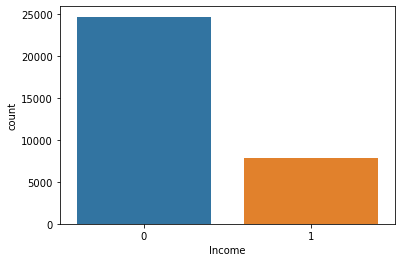

In [33]:
sns.countplot(Y)

Our target or label is not balanced

In [34]:
# Balancing the target column "income" using SMOTE on training data
from imblearn.over_sampling import SMOTE

In [35]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.30, random_state = 285)

In [36]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

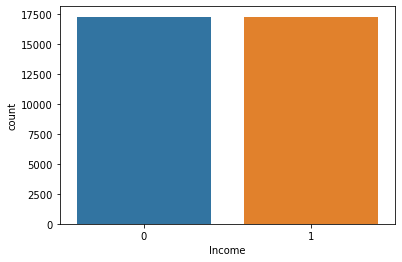

In [37]:
sns.countplot(y_train_rs)
plt.show()

the target column of training data is balanced

In [38]:
#traintestsplit
lg = LogisticRegression()
for i in range(100,500):
    x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.3, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  100 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.56152033603115

-----------------------------------------

At random state  102 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.72543796742137

-----------------------------------------

At random state  104 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.63323429976437

-----------------------------------------

At random state  109 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.85862104292593

-----------------------------------------

At random state  112 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 80.14547689785883

-----------------------------------------

At random state  115 the model performs well
Acuraccy of training model : 79.5565312843029

At random state  201 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.74592767134516

-----------------------------------------

At random state  204 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.88935559881159

-----------------------------------------

At random state  206 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.6947034115357

-----------------------------------------

At random state  207 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.72543796742137

-----------------------------------------

At random state  208 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.56152033603115

-----------------------------------------

At random state  214 the model performs well
Acuraccy of training model : 79.55653128430296

Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.93033500665916

-----------------------------------------

At random state  296 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.93033500665916

-----------------------------------------

At random state  299 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.63323429976437

-----------------------------------------

At random state  300 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.97131441450671

-----------------------------------------

At random state  301 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.56152033603115

-----------------------------------------

At random state  302 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.745927671345

At random state  408 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 80.12498719393506

-----------------------------------------

At random state  409 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.56152033603115

-----------------------------------------

At random state  410 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.55127548406925

-----------------------------------------

At random state  419 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.59225489191681

-----------------------------------------

At random state  426 the model performs well
Acuraccy of training model : 79.55653128430296
Accuracy of testing model : 79.86886589488782

-----------------------------------------

At random state  430 the model performs well
Acuraccy of training model : 79.5565312843029

Selecting 430 as random state

In [39]:
#traintestsplit
x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.30, random_state = 430)

In [40]:
# Model Selection
def model_selection (algorithm, x_train_rs,y_train_rs,x_test,y_test):
    algorithm.fit(x_train_rs,y_train_rs)
    pred_train = algorithm.predict(x_train_rs)
    pred_test = algorithm.predict(x_test)
    auc_score = roc_auc_score(y_test,pred_test)
    
    print (algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train_rs,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of training data :\n",classification_report(y_train_rs,pred_train))
    print ("Classification report of test data :\n ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    
    # Calculate ROC curve
    fpr, tpr, xg1 = roc_curve(y_test, pred_test)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print ("\nAUC score: ",auc_score)
    print ("\n -------------------------------------------------------------\n")

LogisticRegression()
Acuraccy of training model : 0.7930625686059275
Accuracy of testing model : 0.7938735785267903
Classification report of training data :
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     17278
           1       0.64      0.32      0.43      5497

    accuracy                           0.79     22775
   macro avg       0.73      0.63      0.65     22775
weighted avg       0.77      0.79      0.77     22775

Classification report of test data :
                precision    recall  f1-score   support

           0       0.82      0.94      0.87      7419
           1       0.64      0.32      0.43      2342

    accuracy                           0.79      9761
   macro avg       0.73      0.63      0.65      9761
weighted avg       0.77      0.79      0.77      9761

Confusion Matrix 
 [[6988  431]
 [1581  761]]


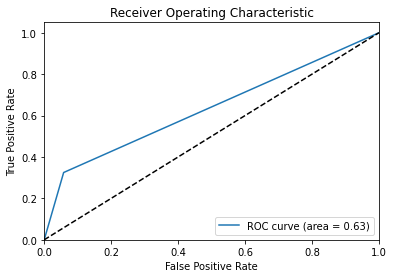


AUC score:  0.6334209347085731

 -------------------------------------------------------------

SVC()
Acuraccy of training model : 0.8165971459934138
Accuracy of testing model : 0.8119045179797152
Classification report of training data :
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     17278
           1       0.72      0.39      0.50      5497

    accuracy                           0.82     22775
   macro avg       0.78      0.67      0.70     22775
weighted avg       0.80      0.82      0.80     22775

Classification report of test data :
                precision    recall  f1-score   support

           0       0.83      0.95      0.88      7419
           1       0.70      0.37      0.49      2342

    accuracy                           0.81      9761
   macro avg       0.77      0.66      0.69      9761
weighted avg       0.80      0.81      0.79      9761

Confusion Matrix 
 [[7047  372]
 [1464  878]]


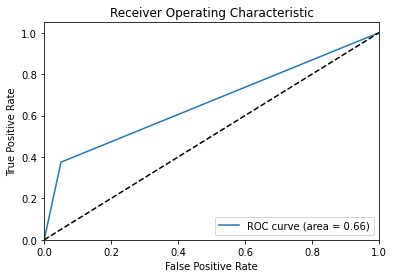


AUC score:  0.6623758625607457

 -------------------------------------------------------------

AdaBoostClassifier()
Acuraccy of training model : 0.8578704720087815
Accuracy of testing model : 0.8587234914455486
Classification report of training data :
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     17278
           1       0.75      0.61      0.67      5497

    accuracy                           0.86     22775
   macro avg       0.82      0.77      0.79     22775
weighted avg       0.85      0.86      0.85     22775

Classification report of test data :
                precision    recall  f1-score   support

           0       0.88      0.94      0.91      7419
           1       0.76      0.61      0.67      2342

    accuracy                           0.86      9761
   macro avg       0.82      0.77      0.79      9761
weighted avg       0.85      0.86      0.85      9761

Confusion Matrix 
 [[6959  460]
 [ 919 1423]]


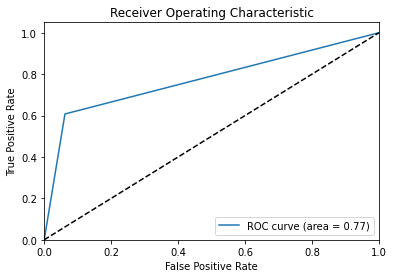


AUC score:  0.7727986881145866

 -------------------------------------------------------------

RandomForestClassifier()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.8518594406310829
Classification report of training data :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17278
           1       1.00      1.00      1.00      5497

    accuracy                           1.00     22775
   macro avg       1.00      1.00      1.00     22775
weighted avg       1.00      1.00      1.00     22775

Classification report of test data :
                precision    recall  f1-score   support

           0       0.88      0.93      0.91      7419
           1       0.73      0.61      0.66      2342

    accuracy                           0.85      9761
   macro avg       0.81      0.77      0.78      9761
weighted avg       0.85      0.85      0.85      9761

Confusion Matrix 
 [[6897  522]
 [ 924 1418]]


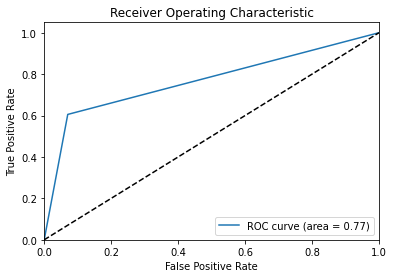


AUC score:  0.7675527636993621

 -------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuraccy of training model : 0.9068715697036224
Accuracy of testing model : 0.8609773588771642
Classification report of training data :
               

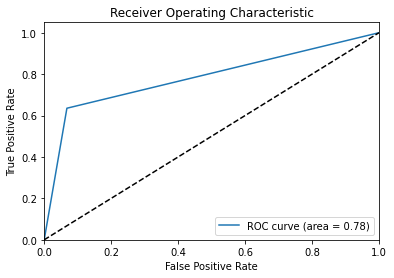


AUC score:  0.7837777516103608

 -------------------------------------------------------------



In [41]:
#Logistic Regression
lr= LogisticRegression()
model_selection(lr,x_train_rs,y_train_rs,x_test,y_test)

#SVC
svc= SVC()
model_selection(svc,x_train_rs,y_train_rs,x_test,y_test)

#Decision Tree
ada = AdaBoostClassifier()
model_selection(ada,x_train_rs,y_train_rs,x_test,y_test)

#Random Forest 
rfc= RandomForestClassifier()
model_selection(rfc,x_train_rs,y_train_rs,x_test,y_test)

#XGBoost
xg = xgb.XGBClassifier()
model_selection(xg,x_train_rs,y_train_rs,x_test,y_test)


Selecting XGBoost for hyperparameter tunning as it has the highest accuracy for testing data and has less False Positives and False Negitives when compared to other models 

In [42]:
# Hyperparameter Tuning :
#XGBoost
params = {
    'learning_rate': [0.1,0.2,0.],
    'max_depth': [5,8,10],
    'gamma': [0, 0.5, 1],
}

clf = GridSearchCV(xg,params)
clf.fit(x_train_rs,y_train_rs)
print ("XGBoost: \n",clf.best_params_)

XGBoost: 
 {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuraccy of training model : 0.8770581778265643
Accuracy of testing model : 0.8645630570638254
Classification report of training data :
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     17278
       

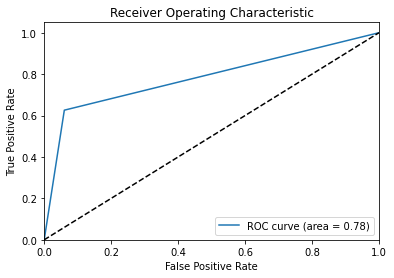


AUC score:  0.7829223993740999

 -------------------------------------------------------------



In [43]:
#XGBoost Tunned
xg1 = xgb.XGBClassifier(gamma=0.5, learning_rate=0.1, max_depth=5)
model_selection(xg1,x_train_rs,y_train_rs,x_test,y_test)

Selecting XGBoost for prediction as it has 
1. The best accuracy 
2. Less number of False Postives and False Negitves
3. Most AUC

In [44]:
# Saving Model
import pickle
filename= 'Cencus_income.pkl'
pickle.dump(xg,open(filename, 'wb'))

In [45]:
#Prediction
a= np.array(y_test)
predicted=np.array (xg.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0
...,...,...
9756,0,0
9757,0,0
9758,0,0
9759,0,0


In [46]:
#Final Prediction
a= L_encoder.inverse_transform(np.array(y_test))
predicted=L_encoder.inverse_transform(np.array (xg.predict(x_test)))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,<=50K,<=50K
1,>50K,<=50K
2,<=50K,<=50K
3,>50K,>50K
4,<=50K,<=50K
...,...,...
9756,<=50K,<=50K
9757,<=50K,<=50K
9758,<=50K,<=50K
9759,<=50K,<=50K
